<a href="https://colab.research.google.com/github/piliroberta/Multiscala_progetto/blob/main/cady_water.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/piliroberta/Multiscala_progetto
!mv Multiscala_progetto/mini_water/* .

In [2]:
#@title Increase the output length 
from notebook.services.config import ConfigManager
cm = ConfigManager().update('notebook', {'limit_output': 10000000})

In [1]:
#@title Installing GROMACS and related packages
!apt install gromacs &> /dev/null
!apt install dssp &> /dev/null
!ln -s /usr/bin/dssp /usr/local/bin/dssp
!apt install ghostscript &> /dev/null

In [ ]:
#@title Installing NGLview
!pip install nglview  &> /dev/null
!pip install simpletraj  &> /dev/null
!pip install mdanalysis &> /dev/null
from google.colab import output
output.enable_custom_widget_manager()

In [4]:
!mkdir cady_mini

In [28]:
!rm position

rm: cannot remove 'position': Is a directory


In [57]:
!gmx pdb2gmx -f cady_3.pdb -i posre.itp -p cadyw.top -o cadyw.gro -ff amber99sb-ildn  -ignh -heavyh -water tip3p

             :-) GROMACS - gmx pdb2gmx, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

In [58]:
!gmx editconf -f cadyw.gro -o box.gro -c -d 0.8 -bt dodecahedron 

             :-) GROMACS - gmx editconf, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leade

In [59]:
!gmx solvate -cp box.gro -o solvated.gro -p cadyw.top 

             :-) GROMACS - gmx solvate, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

In [ ]:
!tail -n 20 cady/solvated.gro

 2006SOL    HW2 6348   4.421   4.242   3.051
 2007SOL     OW 6349   4.197   4.224   2.053
 2007SOL    HW1 6350   4.258   4.304   2.057
 2007SOL    HW2 6351   4.102   4.255   2.060
 2008SOL     OW 6352   3.987   4.050   2.582
 2008SOL    HW1 6353   3.908   4.101   2.548
 2008SOL    HW2 6354   3.978   4.035   2.680
 2009SOL     OW 6355   4.396   3.927   3.351
 2009SOL    HW1 6356   4.486   3.911   3.311
 2009SOL    HW2 6357   4.404   3.932   3.450
 2010SOL     OW 6358   3.796   3.890   2.180
 2010SOL    HW1 6359   3.779   3.973   2.126
 2010SOL    HW2 6360   3.886   3.853   2.158
 2011SOL     OW 6361   4.152   4.148   2.382
 2011SOL    HW1 6362   4.182   4.076   2.320
 2011SOL    HW2 6363   4.113   4.108   2.465
 2012SOL     OW 6364   4.041   4.271   3.142
 2012SOL    HW1 6365   4.079   4.212   3.214
 2012SOL    HW2 6366   4.081   4.245   3.054
   4.52316   4.52316   3.19836   0.00000   0.00000   0.00000   0.00000   2.26158   2.26158


In [ ]:
!tail cady/cadyw.top -n 5


[ molecules ]
; Compound        #mols
Protein             1
SOL              1992


In [60]:
!touch dummy.mdp

In [61]:
!gmx grompp -f dummy.mdp -c solvated.gro -p cadyw.top -o ions.tpr

              :-) GROMACS - gmx grompp, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

In [62]:
!echo "SOL" | gmx genion -s ions.tpr -p cadyw.top -o box_ions.gro -conc 0.15 -neutral

              :-) GROMACS - gmx genion, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

In [63]:
!gmx grompp -f template.mdp -p cadyw.top -c box_ions.gro -o cadyw.tpr -maxwarn 2

              :-) GROMACS - gmx grompp, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

In [64]:
! gmx mdrun -s cadyw.tpr -deffnm cadywmin -v -ntmpi 2

              :-) GROMACS - gmx mdrun, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders

In [71]:
! echo -e "Potential \n 0" | gmx energy -f cadywmin.edr -o potential.xvg

              :-) GROMACS - gmx energy, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

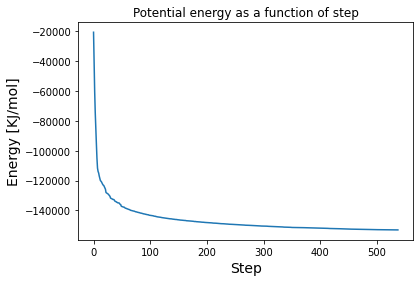

In [72]:
import matplotlib.pyplot as plt # Import from the library matplotlib  the package pyplot and alias it as plt 
import numpy as np #import the library numpy and alias it as np
'''load the data from the potential.xvg format into data, ...
define the comments as raw starting with either # or @'''
data=np.loadtxt("potential.xvg",comments=["#","@"])
step=data[:,0] #assign the first column of data to the variable step
energy=data[:,1] #assign the second column of data to the variable potential
plt.plot(step,energy) #plot the function potential(data)
plt.xlabel("Step",size=14) #assign the x label 
plt.ylabel("Energy [KJ/mol]",size=14) #assign the y label
plt.title("Potential energy as a function of step"); #assign a title 
#save the figure in png format with a resolution of 300 dot per inch "dpi" 
plt.savefig("potential_steep_w.png",format="png", dpi=300)

In [45]:
ls

 box.gro        cadywmin.log     dummy.mdp     potential_steep_w.png
 box_ions.gro   cadywmin.trr     ions.tpr      potential.xvg
 cady_3.pdb     cadyw.top        mdout.mdp     sample_data/
 cadyw.gro     '#cadyw.top.1#'   position2/    solvated.gro
 cadywmin.edr  '#cadyw.top.2#'   posre.itp     template.mdp
 cadywmin.gro   cadyw.tpr       'posre.mdp '


In [68]:
!gmx grompp -f template.mdp -p cadyw.top -c cadywmin.gro -r cadywmin.gro  -o posre1.tpr -maxwarn 2

              :-) GROMACS - gmx grompp, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

In [69]:
!gmx mdrun -s posre1.tpr -deffnm posre1 -v -nt 12 

              :-) GROMACS - gmx mdrun, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders

In [70]:
! echo -e "Temperature" | gmx energy -f posre1.edr -o Temp1.xvg 

              :-) GROMACS - gmx energy, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

In [ ]:
!gmx grompp -f template_d.mdp -p cadyw.top -c cadywmin.gro  -o cadyw_D.tpr -maxwarn 2

              :-) GROMACS - gmx grompp, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

In [ ]:
!gmx mdrun -deffnm cadyw_D -s cady_d/cadyw_D.tpr -v -nt 12

              :-) GROMACS - gmx mdrun, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders

In [ ]:
 !echo -e "Temperature" | gmx energy -f cadyw_D.edr -o Temp_cadyw.xvg 

              :-) GROMACS - gmx energy, 2020.1-Ubuntu-2020.1-1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leader

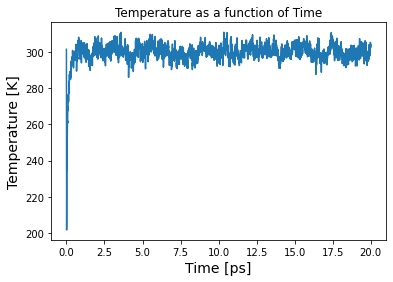

In [77]:
import matplotlib.pyplot as plt # Import from the library matplotlib  the package pyplot and alias it as plt 
import numpy as np #import the library numpy and alias it as np
'''load the data from the potential.xvg format into data, ...
define the comments as raw starting with either # or @'''
data=np.loadtxt("Temp1.xvg",comments=["#","@"])
step=data[:,0] #assign the first column of data to the variable step
energy=data[:,1] #assign the second column of data to the variable potential
plt.plot(step,energy) #plot the function potential(data)
plt.xlabel("Time [ps]",size=14) #assign the x label 
plt.ylabel("Temperature [K]",size=14) #assign the y label
plt.title("Temperature as a function of Time"); #assign a title 
#plt.xlim(1750,2000)

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
     


In [78]:
comm=["#","@"]
temperature=np.loadtxt(f"Temp1.xvg",usecols=(1),comments=comm) 
v=temperature[875:1001]
print(v)
print(np.mean(v))
print(np.std(v))
     


[294.179596 295.914185 296.941895 293.116852 289.208466 290.188477
 294.628693 296.858521 296.171204 294.853241 295.280609 295.375
 296.28949  296.778046 297.466949 295.339142 293.360809 295.286407
 300.084717 301.385712 298.446472 295.723694 296.902985 298.064575
 297.317566 296.086212 296.918182 299.020599 297.467377 294.299255
 296.366852 295.428772 298.562469 302.989655 306.301544 302.306915
 299.843964 300.559967 301.602112 299.936035 299.655334 300.928925
 307.105957 307.010284 307.550354 306.125031 299.53479  300.06723
 305.127716 307.330353 303.903809 303.612549 304.50705  304.417786
 301.378174 299.379395 297.545715 297.590027 303.393463 304.564056
 306.027893 305.563599 302.026489 301.598175 302.472229 302.272461
 301.879425 302.127411 302.645813 301.106354 297.004639 297.322937
 299.867035 302.397736 304.775238 307.540741 306.870697 303.98584
 303.308929 305.652435 304.810059 302.074005 302.456726 302.603455
 302.0914   302.521271 305.439575 304.590149 303.607605 303.691162


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
media = 297.7482863888889
deviazione_standard = 14.148841176084915
x = np.linspace(media - 3*deviazione_standard, media + 3*deviazione_standard, 100)
plt.plot(x, stats.norm.pdf(x, media, deviazione_standard))
plt.show()
     


In [ ]:
!echo -e "Backbone\nBackbone" | gmx rms -s cady_3.pdb -f cady_D1.xtc -o rmsd1.xvg 
!echo -e "System" | gmx trjconv -s cady_D1.tpr -f cady_D1.xtc -dump 2000 -o struct2ns.pdb 
!echo -e "Backbone\nBackbone" | gmx rms -s struct2ns.pdb -f cady_D1.xtc -o rmsd1_2ns.xvg -tu ns

In [ ]:
time, rmsd = np.loadtxt("rmsd1.xvg',comments=['@','#'],unpack=True)
_, rmsd9 = np.loadtxt('rmsd1_2ns.xvg',comments=['@','#'],unpack=True)

# Prepare the figure
fig = plt.figure()
ax = fig.add_subplot(111,)

# Plot your data
ax.plot(time,rmsd,label='Ref: 0 ns',c='k')
ax.plot(time,rmsd9,label='Ref: 2 ns',c='r')

# Adjust the plot and personalize
ax.set_xlim(time[0],time[-1])
m = np.max(np.concatenate((rmsd,rmsd9)))*1.05
ax.set_ylim(0,m)
ax.set_xlabel(r"Time [ps]")
ax.set_ylabel(r"RMSD [nm]")
ax.legend(frameon=False)

# This allows you to adjust the figure limits to make your figure nice
# (Recommended but not compulsory)
fig.tight_layout()



In [ ]:
%%bash
cd 03-analysis/
echo "C-alpha" | gmx rmsf -f cady_D1.xtc -s cady_D1.tpr -o rmsf1.xvg -res

In [ ]:
# Load your data
res, rmsf = np.loadtxt('rmsf1.xvg',comments=['@','#'],unpack=True)

# Prepare the figure
fig = plt.figure()
ax = fig.add_subplot(111,)

# Plot your data
ax.plot(res,rmsf,c='k')

# Adjust the plot and personalize
ax.set_xlim(res[0],res[-1])
m = np.max(rmsf)*1.05
ax.set_ylim(0,m)
ax.set_xlabel(r"Residue number")
ax.set_ylabel(r"RMSF [nm]")

# This allows you to adjust the figure limits to make your figure nice
# (Recommended but not compulsory)
fig.tight_layout()

In [ ]:
%%bash
cd 03-analysis
echo "r 1
r 20
q" | gmx make_ndx -f cady_3.pdb -o index1.ndx
gmx distance -f penetratin.xtc -s topol.tpr -select 'com of group "r_1" plus com of group "r_20"' \
-n index1.ndx -oav distance1.xvg

In [ ]:
time, d = np.loadtxt('distance1.xvg',comments=['@','#'],unpack=True)
time = time/1000 # gmx distance gives output only in ps
fig = plt.figure(figsize=(6,3))
# in time
ax1 = fig.add_subplot(121,)
ax1.plot(time,d,c='k')
ax1.set_xlim(time[0],time[-1])
M = np.max(d)*1.05
m = np.min(d)*0.95
ax1.set_ylim(m,M)
ax1.set_xlabel(r"Time [ps]")
ax1.set_ylabel(r"$d_{ee}$ [nm]")

# histogram
ax2 = fig.add_subplot(122,)
ax2.hist(d,color='k',density=True,alpha=0.5)
ax2.set_ylabel(r"Probability density")
ax2.set_xlabel(r"$d_{ee}$ [nm]")
fig.tight_layout()
